# Proof-Of-Concept de détéction sur image

Ce notebook vise à tester la détection d'objets sur une image, et de prouver l'avancement du projet.

## Imports

In [2]:
import torch
from ultralytics import YOLO
import ultralytics.engine.results 
from matplotlib import pyplot as plt
import cv2 as cv

## Définition du périphérique utilisé & chargement du modèle

In [12]:
device = None

if torch.cuda.is_available():
    n_gpus = torch.cuda.device_count()

    if n_gpus >= 1:
        device = torch.device('cuda:0')
        print('Using CUDA device : ' + str(torch.cuda.get_device_name(device)))
    else:
        device = torch.device('cpu')
        print('CUDA device not found - defaulting to CPU.')
else:
    device = torch.device('cpu')
    print('CUDA device not available - defaulting to CPU.')
    
model = YOLO('yolov8n.pt').to(device)

Using CUDA device : AMD Radeon Graphics


## Définition de code ré-utilisé pour chaque inférence

In [10]:
font = cv.FONT_HERSHEY_SIMPLEX
classes = model.names
assert classes is not None


def draw_rectangle(img, box: ultralytics.engine.results.Boxes, color=(0, 255, 0), thickness=2): 
    """
    Modifies an input loaded OpenCV image to add a rectangle around a detected object.
    :param img: The input image loaded with OpenCV.
    :param box: The box information returned from the model.
    :param color: The color of the rectangle.
    :param thickness: The thickness of the rectangle lines.
    """

    xyxy = box.xyxy.flatten()
    print(xyxy)
    topleft = (int(xyxy[0]), int(xyxy[1]))
    bottomright = (int(xyxy[2]), int(xyxy[3]))

    cv.rectangle(img, topleft, bottomright, color, thickness)

    text = '{} : {:.2f}%'.format(classes[int(box.cls)], box.conf[0] * 100)
    cv.putText(img, text, topleft, font, thickness, color, thickness)




## Inférence


image 1/1 /home/gdr/Documents/UBS/2/SAE_IA/proof-of-concept-detection-image/input.jpg: 448x640 3 dogs, 12.6ms
Speed: 2.7ms preprocess, 12.6ms inference, 1.2ms postprocess per image at shape (1, 3, 448, 640)


tensor([3624.1792,  292.5730, 5196.2373, 3559.8535])
tensor([ 410.1675,  657.8649, 2178.1091, 3571.3677])
tensor([1997.1523,  808.7507, 3828.6172, 3555.5122])


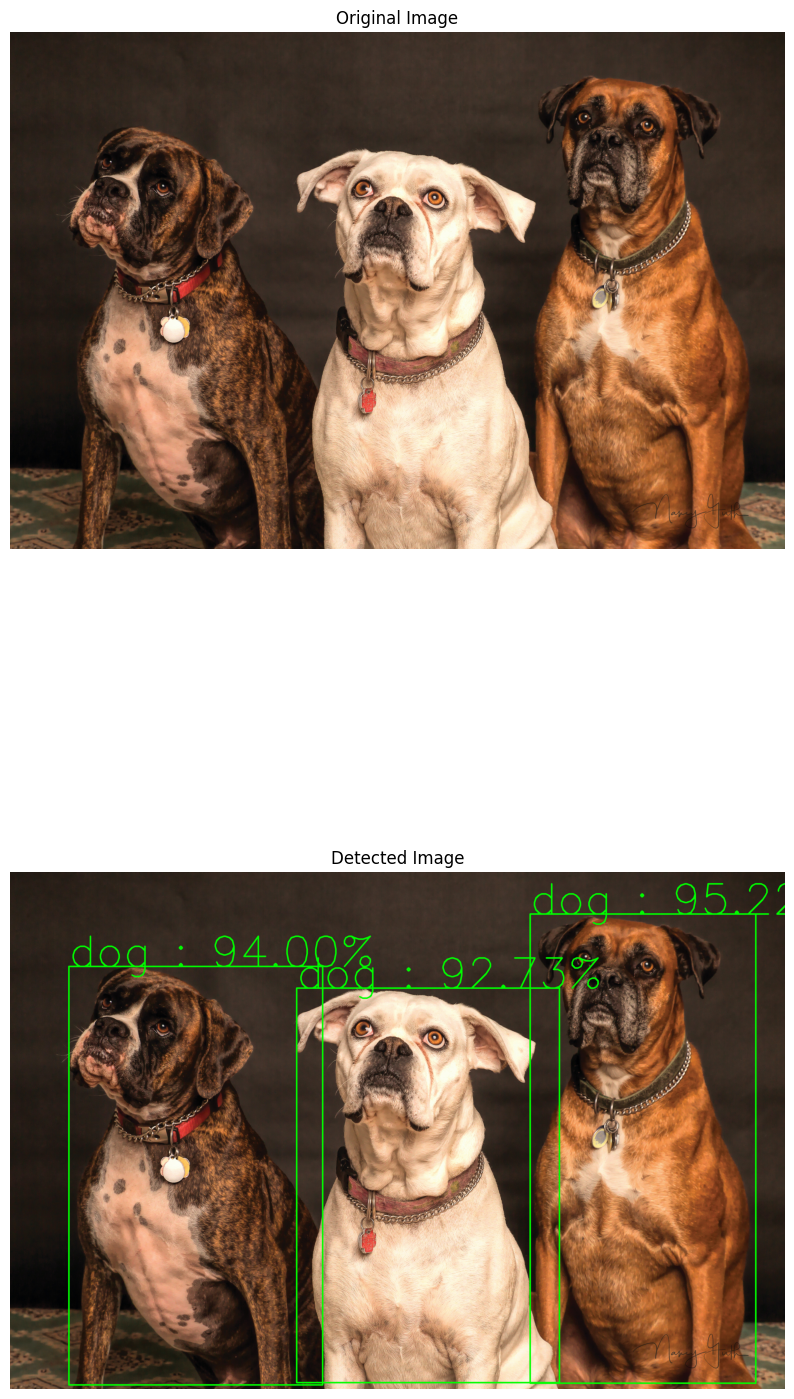

In [13]:
img = 'input.jpg'

img_loaded = cv.imread(img)
img_loaded = cv.cvtColor(img_loaded, cv.COLOR_BGR2RGB)

plt.figure(figsize=(10, 20))

plt.subplot(2, 1, 1)
plt.title('Original Image')
plt.axis('off')
plt.imshow(img_loaded)

results = model(img)[0]

results = results.cpu()

for result in results:
    draw_rectangle(img_loaded, result.boxes, (0, 255, 0), 10)

plt.subplot(2, 1, 2)
plt.title('Detected Image')
plt.axis('off')
plt.imshow(img_loaded)

## Détection de formes

In [6]:

model = YOLO('yolov8m-seg.pt').to(device)

def draw_lines(img, masks: ultralytics.engine.results.Masks, color=(0, 255, 0), alpha=0.5, thickness=2):
    overlay = img.copy()

    xy = masks.xy

    for i in range(0, len(xy)):
        for j in range(1, len(xy[i])):
            cv.line(overlay, (int(xy[i][j-1][0]), int(xy[i][j-1][1])), (int(xy[i][j][0]), int(xy[i][j][1])), color, thickness)

        # Connect last point to first point
        cv.line(overlay, (int(xy[i][0][0]), int(xy[i][0][1])), (int(xy[i][len(xy[i])-1][0]), int(xy[i][len(xy[i])-1][1])), color, thickness)

    
    # Apply the overlay
    cv.addWeighted(overlay, alpha, img, 1 - alpha, 0, img)

    
    

segment



image 1/1 /home/gdr/Documents/UBS/2/SAE_IA/proof-of-concept-detection-image/input.jpg: 448x640 3 dogs, 53.1ms
Speed: 2.1ms preprocess, 53.1ms inference, 4.0ms postprocess per image at shape (1, 3, 448, 640)


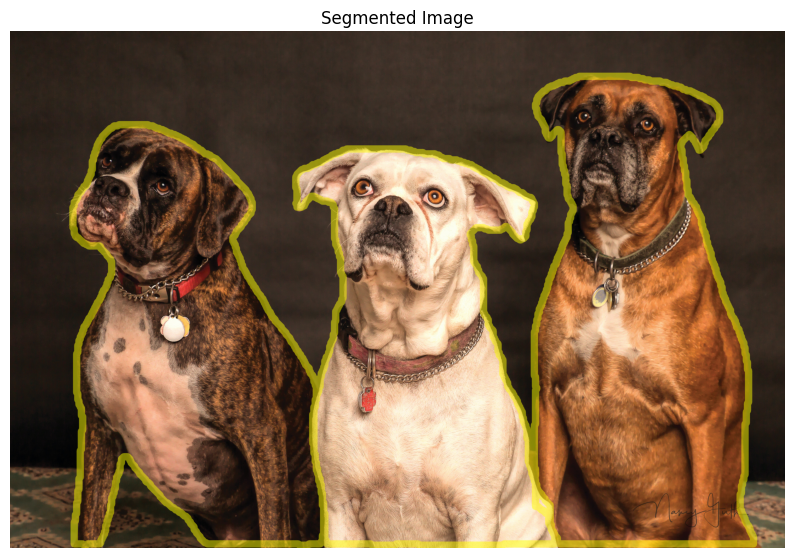

In [7]:
img = 'input.jpg'

img_loaded = cv.imread(img)
img_loaded = cv.cvtColor(img_loaded, cv.COLOR_BGR2RGB)

results = model(img)[0]

draw_lines(img_loaded, results.masks, (255, 255, 0), 0.5, 50)

    

plt.figure(figsize=(10, 20))
plt.title('Segmented Image')
plt.axis('off')
plt.imshow(img_loaded)

plt.show()

